In [1]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [2]:
#Access Data
url_1 = 'http://research.stlouisfed.org/fred2/series/GDPC1/downloaddata/GDPC1.csv'
data_1 = pd.read_csv(url_1, parse_dates=True)
data_1.head()

,DATE,VALUE
0,1947-01-01,2033.061
1,1947-04-01,2027.639
2,1947-07-01,2023.452
3,1947-10-01,2055.103
4,1948-01-01,2086.017


In [3]:

data_1.columns=['DATE','GDP']
data_1.head()

,DATE,GDP
0,1947-01-01,2033.061
1,1947-04-01,2027.639
2,1947-07-01,2023.452
3,1947-10-01,2055.103
4,1948-01-01,2086.017


In [4]:
#Summary Statistics for GDP
data_1.describe()

,GDP
count,295.000000
mean,8783.982559
std,5222.908670
min,2023.452000
25%,4159.357500
50%,7339.893000
75%,13437.577000
max,19253.959000


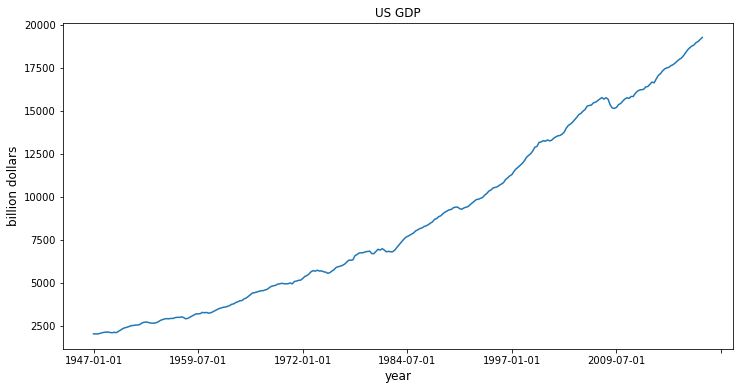

In [5]:
#Graphing the GDP
data1=data_1.set_index('DATE')
ax = data1['1947':'2020'].plot(title='US GDP', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('billion dollars', fontsize=12)
plt.show()

In [6]:
#Access Data
url_2 = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
data_2 = pd.read_csv(url_2, parse_dates=True)
data_2.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [7]:
data_2.columns=['DATE','URATE']
data_2.head()

,DATE,URATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [8]:
#Summary Statistics for Unemployment Rate
data_2.describe()

,URATE
count,875.000000
mean,5.765371
std,1.707381
min,2.500000
25%,4.500000
50%,5.600000
75%,6.800000
max,14.700000


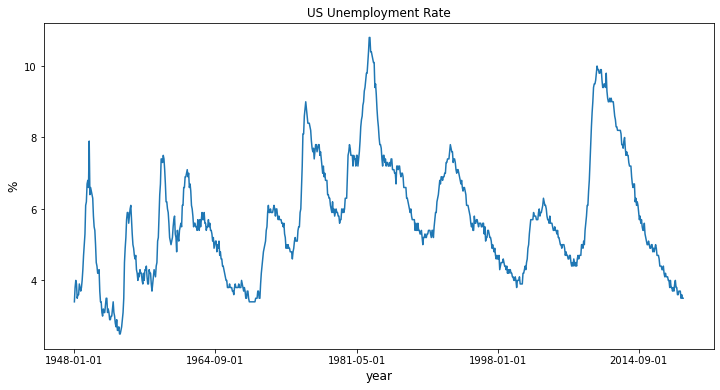

In [9]:
#Graphing the Unemployment Rate
data2=data_2.set_index('DATE')
ax = data2['1948':'2020'].plot(title='US Unemployment Rate', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [38]:
data_merge=pd.merge(data_1, data_2, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
data_merge.head()

,DATE,GDP,URATE
0,1948-01-01,2086.017,3.4
1,1948-04-01,2120.450,3.9
2,1948-07-01,2132.598,3.6
3,1948-10-01,2134.981,3.7
4,1949-01-01,2105.562,4.3


In [39]:
data_merge.fillna(0)

,DATE,GDP,URATE
0,1948-01-01,2086.017,3.4
1,1948-04-01,2120.450,3.9
2,1948-07-01,2132.598,3.6
3,1948-10-01,2134.981,3.7
4,1949-01-01,2105.562,4.3
...,...,...,...
286,2019-07-01,19141.744,3.7
287,2019-10-01,19253.959,3.6
288,2020-01-01,19010.848,3.6
289,2020-04-01,17302.511,14.7


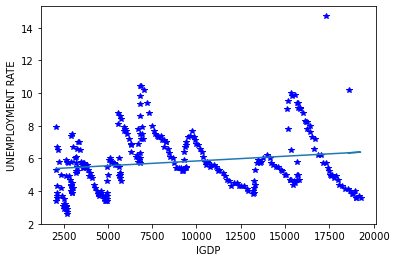

In [40]:
from numpy.polynomial.polynomial import polyfit
fig,ax=plt.subplots()
ax.plot(data_merge['GDP'],data_merge['URATE'],'b*')
ax.set_xlabel("IGDP")
ax.set_ylabel("UNEMPLOYMENT RATE")
b,m=polyfit(data_merge['GDP'],data_merge['URATE'],1)
ax.plot(data_merge['GDP'],b+m*data_merge['GDP'],'-')

In [41]:
#Test for the relationship between unemployment rate and GDP
from scipy.stats import linregress
gradient, intercept, r_value, p_value, std_err = linregress(data_merge['GDP'], data_merge['URATE'])
gradient, intercept, std_err, p_value

(5.833181643764717e-05,
 5.257460509784359,
 1.9425670857936488e-05,
 0.002908784031989305)

In [43]:
#Regression of unemployment rate on unemployment rate and GDP.
data_merge2['const'] = 1
reg1 = sm.OLS(endog=data_merge2['URATE'], exog=data_merge2[['const', 'URATE','GDP']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [44]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [45]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  URATE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.316e+26
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:05:57   Log-Likelihood:                 7626.2
No. Observations:                 291   AIC:                        -1.525e+04
Df Residuals:                     288   BIC:                        -1.524e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.726e-14   2.16e-13      0.450      0.6